In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Retrieve ASML Holdings and Market (e.g., S&P 500) stock data
def retrieve_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']

# Parameters
ASML_TICKER = 'ASML'
MARKET_TICKER = '^GSPC'  # S&P 500 as a market proxy
START_DATE = '2010-01-01'
END_DATE = '2023-03-15'

# Retrieve data
asml_data = retrieve_stock_data(ASML_TICKER, START_DATE, END_DATE)
market_data = retrieve_stock_data(MARKET_TICKER, START_DATE, END_DATE)

# Combine into a DataFrame for easier manipulation
stock_data = pd.DataFrame({'ASML': asml_data, 'S&P_500': market_data})



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Function to calculate daily returns
def calculate_returns(data):
    return data.pct_change().dropna()

# Calculate returns for ASML and the market
returns = stock_data.apply(calculate_returns)


In [5]:
# Function to calculate CAPM
def calculate_capm(stock_returns, market_returns, risk_free_rate):
    # Linear Regression: stock_returns = β * market_returns + α
    slope, intercept, r_value, _, _ = linregress(market_returns, stock_returns)

    # CAPM: Expected Return = Risk-Free Rate + β * (Expected Market Return - Risk-Free Rate)
    # For simplicity, we'll assume the expected market return is the historical average
    expected_market_return = market_returns.mean() * 252  # Annualize
    expected_stock_return = risk_free_rate + slope * (expected_market_return - risk_free_rate)

    print(f"β (Beta): {slope}")
    print(f"α (Alpha): {intercept * 252}")  # Annualize alpha
    print(f"Expected Annual Return for {ASML_TICKER} based on CAPM: {expected_stock_return * 100}%")

    return slope, intercept, expected_stock_return

# Assume an annual risk-free rate (e.g., 10-Year Treasury Yield)
RISK_FREE_RATE = 0.02  # 2%

# Calculate CAPM parameters
beta, alpha, expected_return = calculate_capm(returns['ASML'], returns['S&P_500'], RISK_FREE_RATE / 252)  # Convert risk-free rate to daily


β (Beta): 1.340926311407223
α (Alpha): 0.1617175857084335
Expected Annual Return for ASML based on CAPM: 14.762091556812171%


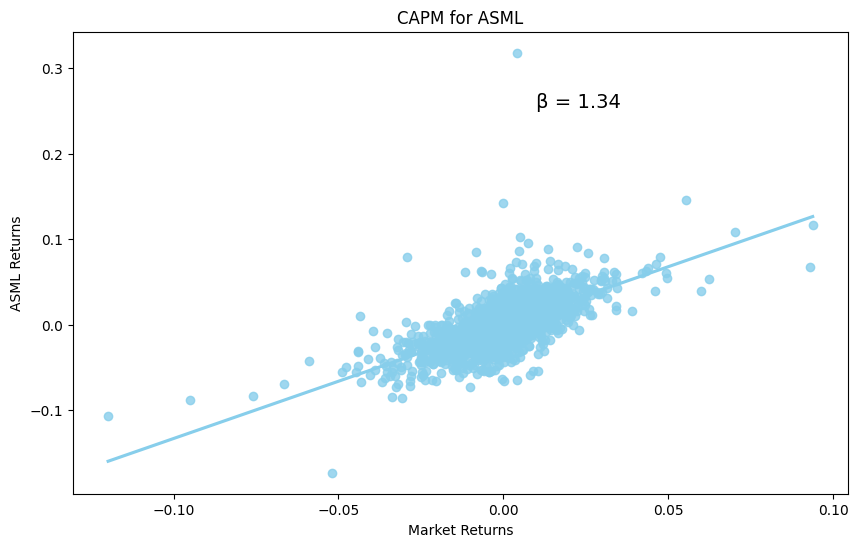

In [6]:
# Plot the CAPM line
plt.figure(figsize=(10,6))
sns.regplot(x=returns['S&P_500'], y=returns['ASML'], ci=None, color='skyblue')
plt.title(f'CAPM for {ASML_TICKER}')
plt.xlabel('Market Returns')
plt.ylabel(f'{ASML_TICKER} Returns')
plt.text(0.01, returns['ASML'].max() * 0.8, f'β = {beta:.2f}', ha='left', fontsize=14)
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


β (Beta): 1.340926311407223
α (Alpha): 0.1617175857084335
Expected Annual Return for ASML based on CAPM: 14.762091556812171%


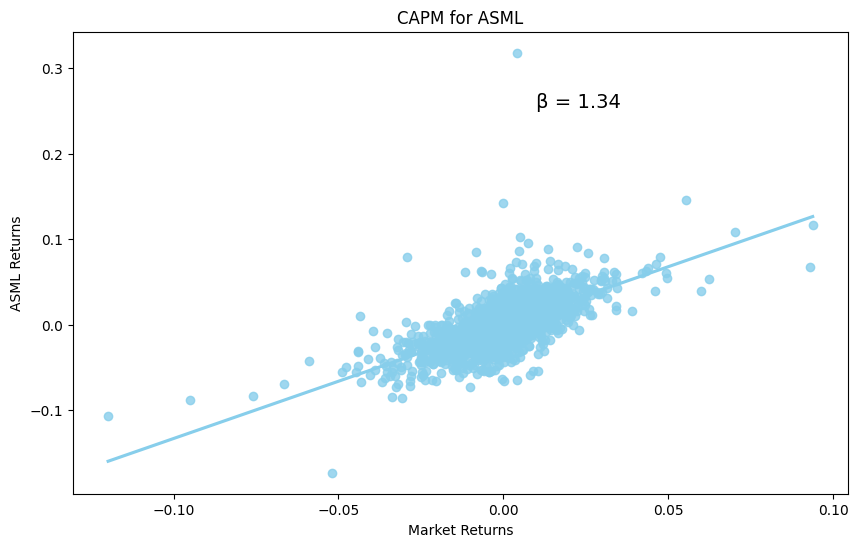

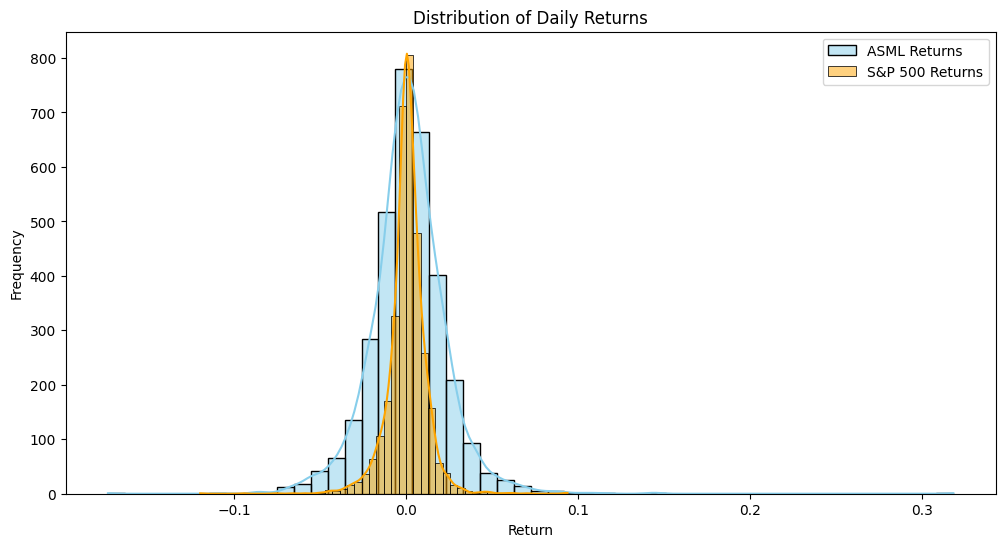

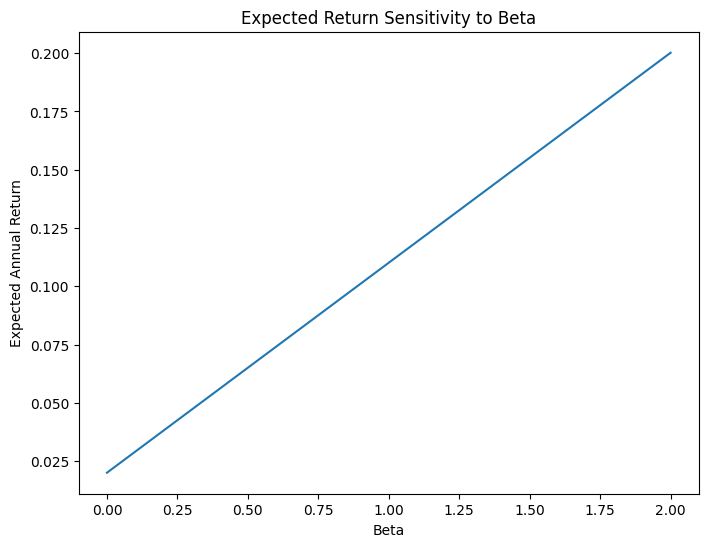

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


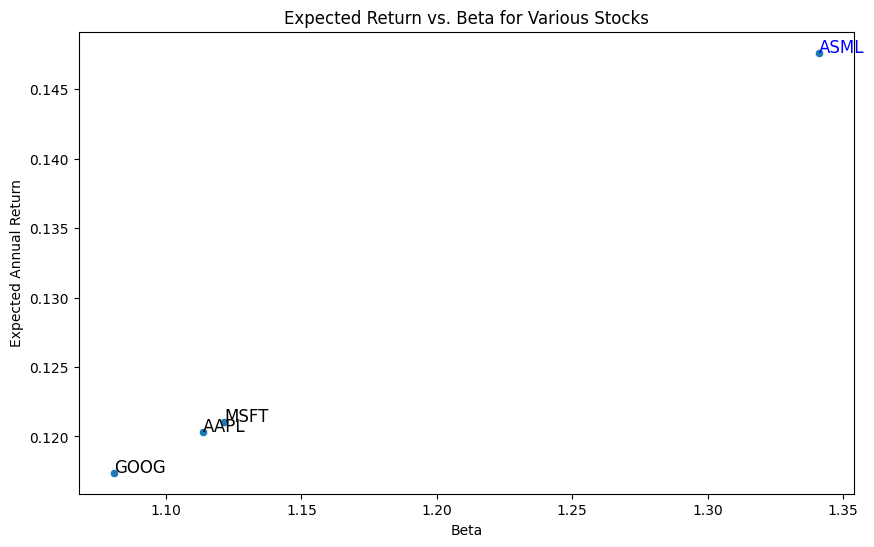

In [21]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime

# Retrieve ASML Holdings and Market (e.g., S&P 500) stock data
def retrieve_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']

# Parameters
ASML_TICKER = 'ASML'
MARKET_TICKER = '^GSPC'  # S&P 500 as a market proxy
START_DATE = '2010-01-01'
END_DATE = '2023-03-15'

# Retrieve data
asml_data = retrieve_stock_data(ASML_TICKER, START_DATE, END_DATE)
market_data = retrieve_stock_data(MARKET_TICKER, START_DATE, END_DATE)

# Combine into a DataFrame for easier manipulation
stock_data = pd.DataFrame({'ASML': asml_data, 'S&P_500': market_data})

# Function to calculate daily returns
def calculate_returns(data):
    return data.pct_change().dropna()

# Calculate returns for ASML and the market
returns = stock_data.apply(calculate_returns)

# Function to calculate CAPM
def calculate_capm(stock_returns, market_returns, risk_free_rate):
    # Linear Regression: stock_returns = β * market_returns + α
    slope, intercept, r_value, _, _ = linregress(market_returns, stock_returns)

    # CAPM: Expected Return = Risk-Free Rate + β * (Expected Market Return - Risk-Free Rate)
    expected_market_return = market_returns.mean() * 252  # Annualize
    expected_stock_return = risk_free_rate + slope * (expected_market_return - risk_free_rate)

    print(f"β (Beta): {slope}")
    print(f"α (Alpha): {intercept * 252}")  # Annualize alpha
    print(f"Expected Annual Return for {ASML_TICKER} based on CAPM: {expected_stock_return * 100}%")

    return slope, intercept, expected_stock_return, expected_market_return

# Assume an annual risk-free rate (e.g., 10-Year Treasury Yield)
RISK_FREE_RATE = 0.02  # 2%

# Calculate CAPM parameters
beta, alpha, expected_return, expected_market_return = calculate_capm(returns['ASML'], returns['S&P_500'], RISK_FREE_RATE / 252)  # Convert risk-free rate to daily

# Plot the CAPM line
plt.figure(figsize=(10,6))
sns.regplot(x=returns['S&P_500'], y=returns['ASML'], ci=None, color='skyblue')
plt.title(f'CAPM for {ASML_TICKER}')
plt.xlabel('Market Returns')
plt.ylabel(f'{ASML_TICKER} Returns')
plt.text(0.01, returns['ASML'].max() * 0.8, f'β = {beta:.2f}', ha='left', fontsize=14)
plt.show()

### **1. Histograms for Returns Distribution**
plt.figure(figsize=(12,6))
sns.histplot(returns['ASML'], bins=50, kde=True, color='skyblue', label='ASML Returns')
sns.histplot(returns['S&P_500'], bins=50, kde=True, color='orange', label='S&P 500 Returns')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Vary beta to see impact on expected return
betas = np.linspace(0, 2, 100)
expected_returns = [RISK_FREE_RATE + b * (expected_market_return - RISK_FREE_RATE) for b in betas]

plt.figure(figsize=(8,6))
plt.plot(betas, expected_returns)
plt.title('Expected Return Sensitivity to Beta')
plt.xlabel('Beta')
plt.ylabel('Expected Annual Return')
plt.show()


# For demonstration, add a few more stocks (update as needed)
stocks = ['AAPL', 'MSFT', 'GOOG']
betas = [beta]  # Start with ASML's beta
expected_returns = [expected_return]  # Start with ASML's expected return

# Calculate betas and expected returns for additional stocks
for stock in stocks:
    stock_returns = yf.download(stock, start=START_DATE, end=END_DATE)['Adj Close'].pct_change().dropna()
    slope, _, _, _, _ = linregress(returns['S&P_500'], stock_returns)
    betas.append(slope)
    expected_returns.append(RISK_FREE_RATE + slope * (expected_market_return - RISK_FREE_RATE))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=betas, y=expected_returns)
plt.annotate(ASML_TICKER, (betas[0], expected_returns[0]), color='blue', fontsize=12)  # Annotate ASML
for i, stock in enumerate(stocks):
    plt.annotate(stock, (betas[i + 1], expected_returns[i + 1]), fontsize=12)  # Annotate other stocks
plt.title('Expected Return vs. Beta for Various Stocks')
plt.xlabel('Beta')
plt.ylabel('Expected Annual Return')
plt.show()

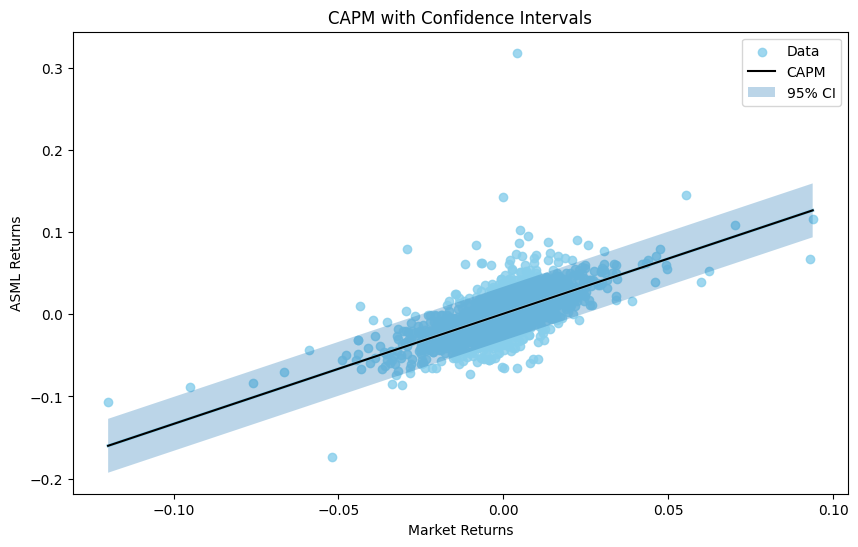

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


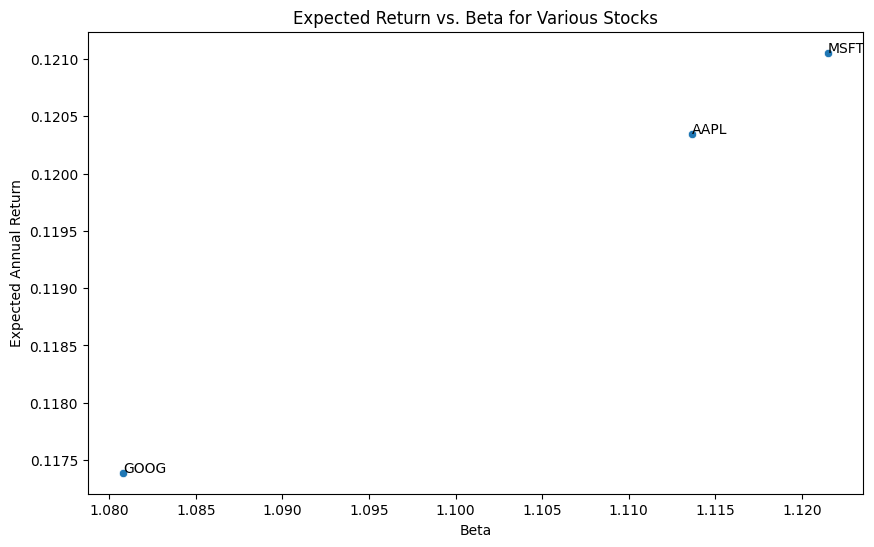

In [19]:
# Calculate CAPM line and confidence intervals
x = np.linspace(returns['S&P_500'].min(), returns['S&P_500'].max(), 100)
y_capm = beta * x + alpha

# Confidence intervals (simplified, assuming normal residuals)
residuals = returns['ASML'] - (beta * returns['S&P_500'] + alpha)
std_err = residuals.std()
ci_upper = y_capm + 1.96 * std_err
ci_lower = y_capm - 1.96 * std_err

plt.figure(figsize=(10,6))
sns.regplot(x=returns['S&P_500'], y=returns['ASML'], ci=None, color='skyblue', label='Data')
plt.plot(x, y_capm, color='black', label='CAPM')
plt.fill_between(x, ci_lower, ci_upper, alpha=0.3, label='95% CI')
plt.title('CAPM with Confidence Intervals')
plt.xlabel('Market Returns')
plt.ylabel(f'{ASML_TICKER} Returns')
plt.legend()
plt.show()




In [22]:
# Simplified VaR calculation (95% confidence, 1-day horizon)
var_percentile = 0.05
var_cutoff = np.percentile(returns['ASML'], var_percentile * 100)
var_value = var_cutoff * (stock_data['ASML'].iloc[-1])  # Approximate VaR value in $
print(f'VaR (95% confidence, 1-day): -${abs(var_value):.2f}')


VaR (95% confidence, 1-day): -$20.49


In [25]:
# Assuming risk-free rate is for the same period as the stock returns
sharpe_ratio = (returns['ASML'].mean() - (RISK_FREE_RATE / 252)) / returns['ASML'].std()
print(f'Sharpe Ratio for {ASML_TICKER}: {sharpe_ratio:.4f}')

# Optional: Calculate Sharpe Ratios for other stocks as well
sharpe_ratios = {ASML_TICKER: sharpe_ratio}  # Initialize with ASML's Sharpe Ratio

# Calculate Sharpe Ratios for additional stocks
for stock in stocks:
    stock_returns = yf.download(stock, start=START_DATE, end=END_DATE)['Adj Close'].pct_change().dropna()
    stock_sharpe_ratio = (stock_returns.mean() - (RISK_FREE_RATE / 252)) / stock_returns.std()
    sharpe_ratios[stock] = stock_sharpe_ratio

# Print all Sharpe Ratios
for stock, ratio in sharpe_ratios.items():
    print(f'Sharpe Ratio for {stock}: {ratio:.4f}')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sharpe Ratio for ASML: 0.0511
Sharpe Ratio for ASML: 0.0511
Sharpe Ratio for AAPL: 0.0573
Sharpe Ratio for MSFT: 0.0474
Sharpe Ratio for GOOG: 0.0354
